#TP5

Étienne Martel (111 239 071)

Tristan Thibault (111 234 027)

Pierre-Olivier Desrosiers (111 271 538)



#**Modules, constantes et fonctions importantes**

De prime d'abord, je vous ai tout de même joint les fichiers nécessaires afin que les cellules de code puissent s'éxecuter. Aussi, on a modifié les différents path pour que notre code fonctionne sur le colab. Il se pourrait que ce soit différent dépendemment sur quel logiciel vous lisez le notebook.

In [ ]:
###Import###
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import numpy as np
import scipy.interpolate
import scipy.fftpack as fft
### VARIABLES ###
#Pour le numéro 1 :
nu = 0.2059 #cm^-1
dist1 = 5 #cm
dist2 = 20 #cm


## largeur d'un élément de détecteur (cm)
pixsize = 0.165

## taille du détecteur (nombre d'échantillons)
nbpix = 336

### paramètres de reconstruction ###

## taille de la grille d'image (carrée)
nbvox = 96 # options: 96, 192

## taille du voxel (carré) (cm)
voxsize = 0.4 # option: 0.4, 0.2


N=720 # Nombre de prises de données (720 angles)

## fichiers d'entrée
dataDir = "/content/"
<<<<<<< local
=======
#### CORRECTIONS
dataDir = "./data/"
#### FIN CORRECTIONS
>>>>>>> remote
anglesFile = "angles.txt"
sinogramFile = "sinogram-patient.txt"

In [ ]:
## lire la liste des angles, convertir de degrés vers rad
## limiter à une plage [0, 2pi]
def readAngles(filename):

    angles = np.loadtxt(filename)
    nbprj = angles.shape[0]

    # convertir en radians element par element
    angles = (np.pi/180.0)*angles

    return [nbprj, angles]

## lire un sinogramme
def readSinogram(filename):

    sinogram = np.loadtxt(filename)
    nbprj = sinogram.shape[0]
    nbpix = sinogram.shape[1]

    return [nbprj, nbpix, sinogram]


#enregistrer l'image
def saveImage(image, prefix):
    im = plt.imshow(image, cmap = cm.Greys_r)
    plt.colorbar()
    plt.title("method: "+prefix)
    plt.savefig(prefix+"-"+time.strftime("%Y%m%d-%H%M%S")+".png")
    plt.show()

def readInput():
    # lire les angles
    [nbprj, angles] = readAngles(dataDir+anglesFile)

    print("nbprj:",nbprj)
    print("angles min and max (rad):")
    print("["+str(np.min(angles))+", "+str(np.max(angles))+"]")

    # lire le sinogramme
    [nbprj2, nbpix2, sinogram] = readSinogram(dataDir+sinogramFile)

    if nbprj != nbprj2:
        print("angles file and sinogram file conflict, aborting!")
        exit(0)

    if nbpix != nbpix2:
        print("geo description and sinogram file conflict, aborting!")
        exit(0)

    return [nbprj, angles, sinogram]
[nbprj, angles, sinogram] = readInput()


nbprj: 720
angles min and max (rad):
[0.008726646259971648, 6.283185307179586]


#**Question 1**

On trouve tout d'abord sur le site web du NIST que le coefficient d'atténuation linéaire (diffusion cohérente) est de 0.2059 $cm^2/g$. Ainsi, on veut la valeur en $cm^{-1}$, donc on doit le diviser par sa masse volumique, soit 1 $g/cm^3$, ce qui nous donne 0.2059 $cm^{-1}$ Ainsi, si on veut savoir la formule pour avoir la fraction subsistante, on a :

\begin{align}
        ln(\frac{I_0}{I}) = \sum\mu \Delta x 
\end{align}

\begin{align}
        \frac{I_0}{I} = e^ {\mu \Delta x }
\end{align}

\begin{align}
        I = \frac{I_0}{e^ {\mu \Delta x }}
\end{align}
Ainsi, le programme python ci-dessous nous permettra de calculer la fraction subsistante après 5 et 20 cm.



In [ ]:
def fraction_sub(distance):
  return 1/np.exp(nu*distance)

print(f"La fraction subsistante après", dist1, "cm est de", fraction_sub(dist1), "I_0")
print(f"La fraction subsistante après", dist2, "cm est de", fraction_sub(dist2), "I_0")

La fraction subsistante après 5 cm est de 0.35718550868274057 I_0
La fraction subsistante après 20 cm est de 0.016277035981532836 I_0


### Commentaires
1. Je trouve un peu curieux que vous regroupez des variables pour seuelement Q1 dans vos déclarations globales au début.

### Note
10.0/10.0

#**Question 2**

On a tout d'abord que la géométrie du problème est représenté à la figure suivante. Afin de déterminer à quelle position le faisceau passant par le milieu du voxel touchera la détecteur, il suffit de suivre les étapes suivantes.
1) Tout d'abord, on dresse nos positions du centre de chaque voxel;
2) On trouve nos équations pour le détecteur et le faisceau. Pour cette étape, on trouve aisément que l'équation respectant la position du détecteur est donnée par:
\begin{align}
        y  =  -xtan(\theta)
    \end{align}
Ainsi, puisque le faisceau arrive toujours à incidence normal, on a que sa pente est donnée par l'inverse de la pente du détecteur multiplié par un facteur -1 et on trouve que:
\begin{align}
        y  =  xcot(\theta) + b
    \end{align}
3) On trouve notre valeur de b, en remplaçant les variables de y et de x par la position du centre du voxel pour trouver notre l'équation de notre courbe;
4) On trouve ensuite le point d'intersection entre le détecteur et le faisceau;
5)Une simple application du théorème de pythagore est de mise afin de trouver la distance entre le point d'impact et le centre du détecteur;
6) On trouve ensuite, dépendemment du quadrant auquel le détecteur se trouve, la distance auquel le rayon frappe le détecteur à l'aide de la fonction round(positon relative sur le détecteur * 336) afin d'utiliser la méthode du plus proche voisin;
7) Pour le #5 où il est demandé d'utiliser l'interpolation linéaire, l'étape 6 devient : Trouver les décimales de la position et utiliser la formule suivante : 
\begin{align}
        Intensité = y_1 + (y_2 - y_1)\cdot décimale
    \end{align}

Enfin, on a manuellement mis ajouter nos valeurs d'atténuation lorsque l'angle est de $0$, $\pi/2$, $\pi$ et $2\pi$, afin de ne pas causer de soucis avec les fonctions tangente et cotangente

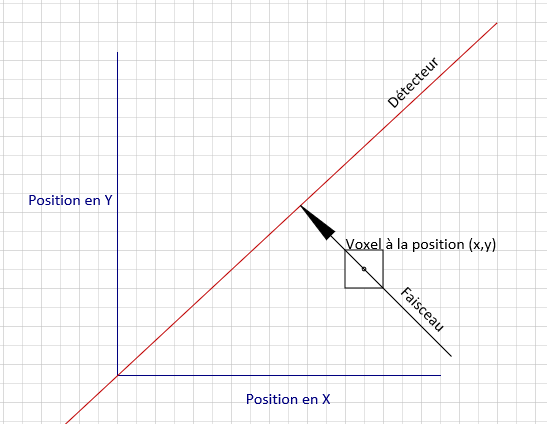

In [ ]:

def laminogram(filter_option):

    [nbprj, angles, sinogram] = readInput()

     # initialiser une image reconstruite
    image = np.zeros((nbvox, nbvox))
    if filter_option == 'on':
      sinogram = filterSinogram(sinogram)
    else:
      pass
     # "etaler" les projections sur l'image
     # ceci sera fait de façon "voxel-driven"
     # pour chaque voxel, trouver la contribution du signal reçu
    for j in range(nbvox): # colonnes de l'image
        print("working on image column: "+str(j+1)+"/"+str(nbvox))
        position_x_vox = j*0.4 - 19
        for i in range(nbvox): # lignes de l'image
            position_y_vox = 19 - i*0.4
            for a in range(len(angles)):
                #On va chercher notre valeur de thêta
                theta = angles[a] #en radian
<<<<<<< local
                if theta == np.pi/2 or theta == 3*np.pi/2 or theta == np.pi or theta == 0 :
=======
                if theta == np.pi/2 or theta == 3*np.pi/2 or theta == np.pi or theta == 0:
>>>>>>> remote
                    if theta == np.pi / 2 :
                        indice = round(((27.72 + position_x_vox) / 55.44) * 336)

                    if theta == np.pi :
                        indice = round(((27.72 + position_y_vox) / 55.44) * 336)

                    if theta == 3*np.pi/2:
                        indice = round(((27.72 - position_x_vox) / 55.44) * 336)

                    if theta == 0 or theta == 2*np.pi:
                        indice = round(((27.72 - position_y_vox) / 55.44) * 336)

                else:
                #Puisque ce sont des faisceaux parallèles, l'équation de chaque droite respecte y = ax + b. On trouve tout d'abord notre valeur de b.
                    b_faisceau = position_y_vox - np.cos(theta) / np.sin(theta) * position_x_vox

                    #On trouve notre points d'intersection entre le faisceau traversant le voxel et le détecteur centré en (0,0)
                    x_commun = (-b_faisceau) / ((np.cos(theta) / np.sin(theta)) + np.tan(theta))
                    y_commun = (-x_commun) * np.tan(theta)

                #Avec le point d'intersection, on trouve la distance entre le milieu et le point d'intérêt
                #On trouve ensuite notre position relative sur le détecteur et on utilise la fonction round() afin d'utiliser la méthode du plus proche voisin
                    dist_milieu_detect = np.sqrt(x_commun**2 + y_commun**2)
<<<<<<< local

=======
                    if j >= 48 :
                        position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44
                    if j < 48 :
                        position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44

>>>>>>> remote
                    if theta > 7*np.pi/4 and theta < 2*np.pi :
                        if j >= 48 :
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44
                        if j < 48 :
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44

                    if theta > 0 and theta < np.pi/4 :
                        if j >= 48 :
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44
                        if j < 48 :
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44



                    if theta  > np.pi/4 and theta < 3*np.pi/4 :
                        if i >= 48:
                            position_rel_detecteur = 1 / 2 - dist_milieu_detect / 55.44

                        if i < 48:
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44

                    if theta > 3*np.pi/4 and theta < 5*np.pi/4 :
                        if j >= 48:
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44
                        if j < 48:
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44

                    if theta > 5*np.pi/4 and theta < 7*np.pi/4 :
                        if i >= 48:

                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44
                        if i < 48:
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44

                    indice = round(position_rel_detecteur * 336)
                image[i][j] += sinogram[a][indice]
    if filter_option == 'on':
      plt.title('Rétroprojection filtrée')
    else:
      plt.title('Rétroprojection simple')

    return image
start_time = time.time()
plt.figure(figsize=(6,6))
plt.pcolor(laminogram('no_filter'), cmap = cm.Greys_r)
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

On remarque facilement qu'une rétroprojection simple n'est pas suffisant pour un diagnostic médical. L'image reconstruite est plus brillante et plus claire au point qu'on ne voit casiment plus les poumons. Cela est dû au fait, tel que mentionné dans le TP, que l'addition de 720 basses fréquences spatiale dans l'image, vient créer une image ayant un signal s'apparentant à une gaussienne. Ainsi, tel qu'il va être montrer aux numéros 3 et 4, un filtre passe-haut permettrait de "couper" la pointe de la gaussienne et ainsi, avoir un signal de l'image plus lisible.



### Commentaires
1. Vous avez soumis vos fichiers dans un dossier appeler "data" mais votre code demande un dossier "content"? Je ne devrais pas devoir modifier votre code pour le faire tourner. Votre path était aussi sous un format absolu? (-3)
2. Je ne suis vraiment pas fan du "flood" de prints
3. Au lieu de `for a in range(len(angles))` vous pouvez faire quelque chose comme `for a, angle in enumerate(angles)`, qui est un peu plus clair et propre. Vous auriez aussi pu faire ceci en notation slicing
4. Je ne comprends vraiment pas votre série de if/else à la fin de votre fonction. Ils sont tous identiques, pourquoi avoire plusieurs ifs parents? Simplement enlevé cet enchainement résout l'artefact horizontal à travers votre image
    * Vous avez le même problème plus haut dans vostre fonction. Beaucoup de ifs inutils qui en fin de compte font des conditions vraiment bizarre (-2)
    
### Note
5.0/10.0

#**Question 3**

Bien faire attention pour ce numéro, lorsqu'on éxecute la cellule plus d'une fois, le sinogram sera filtré plus d'une fois et donc, on perd beaucoup de signal. Les images du sinogramme filtré et celui non-filtré se trouvent en dessous de ce numéro.

In [ ]:

def filterSinogram(sinogram):
    for i in range(sinogram.shape[0]):
        sinogram[i] = filterLine(sinogram[i])
    return sinogram

 ## filter une ligne (projection) via FFT
def filterLine(projection):
    big_P = np.fft.fft(projection, axis = 0)
    nu = np.fft.fftfreq(big_P.shape[0])
    big_P_f = big_P.T * np.abs(nu)
    p_f = np.real(np.fft.ifft(big_P_f, axis = 0))
    return p_f

def saveImage(image, prefix):
    im = plt.imshow(image, cmap = cm.Greys_r)
    plt.imshow(sinogram, cmap = cm.Greys_r )
    plt.colorbar()
    plt.title("method: "+prefix)
    plt.savefig(prefix+"-"+time.strftime("%Y%m%d-%H%M%S")+".png")


plt.figure(figsize=(6,6))
plt.pcolor(filterSinogram(sinogram), cmap = cm.Greys_r)
plt.pcolor(sinogram, cmap = cm.Greys_r)
plt.show()
#saveImage(filterSinogram(sinogram), 'sinogram filtré')


On constate facilement que le filtre passe-haut est efficace. En effet, le filtre passe-haut permet d'enlever toutes les basses fréquences et on voit très bien le nombre important de basses fréquences que le sinogramme avait, puisque, en se basant sur l'échelle à droite des images, on passe d'un signal de 6 à 0.2 pour les régions où le facteur 
ln(I_0/I) est le plus élevé.

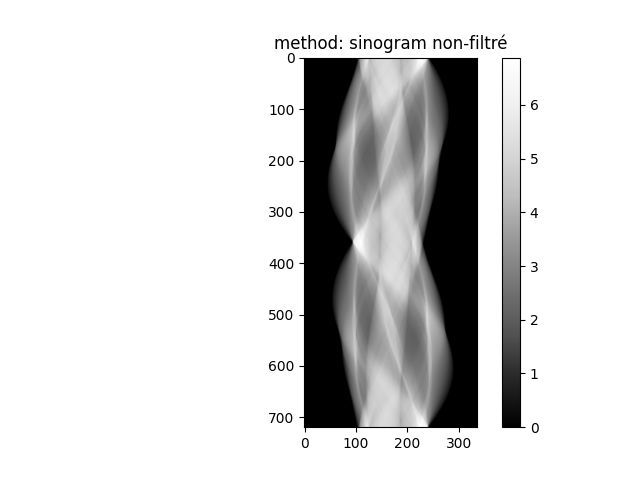

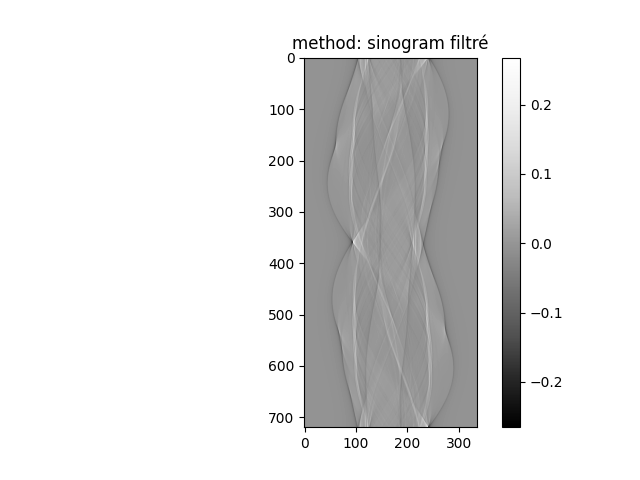

### Commentaires
1. "On constate facilement que le filtre passe-haut est efficace. En effet, le filtre passe-haut permet d'enlever toutes les basses fréquences"
    * Je ne vois pas comment vous arrivez a voire que toutes basses fréquences sont maintenant abscente juste par cette image
2. "on passe d'un signal de 6 à 0.2"
    * Comment est ce que l'échelle passe au négatif par cette logique?
3. "enlever toutes les basses fréquences"
    * Comment définissez vous "basse fréquences"?
4. En général les commentaires ne lisent pas comme si vous avez vraiment compris ce que vous faites, ni même ce que font les fonctions que vous avez utilisées (-4).
### Note
6.0/10.0

#**Question 4**

Pour rendre le cahier moins lourd à regarder, dans la fonction représenté au numéro 2, j'ai ajouté l'option filtre. Si l'argument de la fonction est 'on', le filtre sera ajouté, si n'importe quel autre argument est utilisé (si c'est une string bien sûr), le filtre ne sera pas ajouté. Maintenant, pour parler de la partie intéressante, on remarque vraiment bien les détails de l'image. En effet, lors du numéro 2, on pouvait seulement voir la forme des poumons. Cependant, avec l'ajout du filtre passe-haut, on peut voir aisément les bronches (points blancs dans les poumons), le sternum (rectangle blanc en haut de l'image) et on peut un peu voir la colonne vertébrale qui est le cercle pâle en bas de l'image.

In [ ]:
start_time = time.time()

plt.figure(figsize=(6,6))
plt.pcolor(laminogram('on'), cmap = cm.Greys_r)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

### Commentaires
1. Dans le devoir: "Ou sont situées les erreurs et que diriez-vous de la fréquence spatiale des erreurs"?
    * Je ne vois rien qui réponde à cela (-3)
2. Le montant d'artefact ici aurait vraiment du vous faire remettre en question votre algorithme de laminogram

### Note
7.0/10.0

#**Question 5**

In [ ]:
def backproject():

    [nbprj, angles, sinogram] = readInput()

     # initialiser une image reconstruite
    image = np.zeros((nbvox, nbvox))

#     ### option filtrer ###
    sinogram = filterSinogram(sinogram)
#     ######

#     # "etaler" les projections sur l'image
#     # ceci sera fait de façon "voxel-driven"
#     # pour chaque voxel, trouver la contribution du signal reçu
    for j in range(nbvox): # colonnes de l'image
        print("working on image column: "+str(j+1)+"/"+str(nbvox))
        position_x_vox = j*0.4 - 19
        for i in range(nbvox): # lignes de l'image
            position_y_vox = 19 - i*0.4
            for a in range(len(angles)):
                #On va chercher notre valeur de thêta
                theta = angles[a] #en radian
                if theta == np.pi/2 or theta == 3*np.pi/2 or theta == np.pi or theta == 0 :
                    if theta == np.pi / 2 :
                        indice = ((27.72 + position_x_vox)) / 55.44 * 336

                    if theta == np.pi :
                        indice = ((27.72 + position_y_vox) / 55.44) * 336

                    if theta == 3*np.pi/2:
                        indice = ((27.72 - position_x_vox) / 55.44) * 336

                    if theta == 0 or theta == 2*np.pi:
                        indice = ((27.72 - position_y_vox) / 55.44) * 336

                else:
                #Puisque ce sont des faisceaux parallèles, l'équation de chaque droite respecte y = ax + b. On trouve tout d'abord notre valeur de b.
                    b_faisceau = position_y_vox - np.cos(theta) / np.sin(theta) * position_x_vox

                    #On trouve notre points d'intersection entre le faisceau traversant le voxel et le détecteur centré en (0,0)
                    x_commun = (-b_faisceau) / ((np.cos(theta) / np.sin(theta)) + np.tan(theta))
                    y_commun = (-x_commun) * np.tan(theta)

                #Avec le point d'intersection, on trouve la distance entre le milieu et le point d'intérêt
                #On trouve ensuite notre position relative sur le détecteur et on utilise la fonction round() afin d'utiliser la méthode du plus proche voisin
                    dist_milieu_detect = np.sqrt(x_commun**2 + y_commun**2)

                    if theta > 7*np.pi/4 and theta < 2*np.pi :
                        if j >= 48 :
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44
                        if j < 48 :
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44

                    if theta > 0 and theta < np.pi/4 :
                        if j >= 48 :
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44
                        if j < 48 :
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44



                    if theta  > np.pi/4 and theta < 3*np.pi/4 :
                        if i >= 48:
                            position_rel_detecteur = 1 / 2 - dist_milieu_detect / 55.44

                        if i < 48:
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44

                    if theta > 3*np.pi/4 and theta < 5*np.pi/4 :
                        if j >= 48:
                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44
                        if j < 48:
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44

                    if theta > 5*np.pi/4 and theta < 7*np.pi/4 :
                        if i >= 48:

                            position_rel_detecteur = 1 / 2 + dist_milieu_detect / 55.44
                        if i < 48:
                            position_rel_detecteur =  1 / 2 - dist_milieu_detect / 55.44

                    indice = position_rel_detecteur * 336
                if round(indice) - indice < 0:
                    pourcent = 1 - (indice - round(indice))
                if round(indice) - indice >= 0:
                    pourcent = round(indice) - indice

                image[i][j] += sinogram[a][round(indice-0.5)] + (sinogram[a][round(indice+0.5)] - sinogram[a][round(indice-0.5)]) * pourcent
    return image
start_time = time.time()
plt.figure(figsize=(6,6))
plt.pcolor(backproject(), cmap = cm.Greys_r)
plt.title('Rétroprojection filtrée (interpolation)')
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))
    #saveImage(res, "lam")

L'image s'est amélioré dans le sens que les détails de l'image(i.e les bronches, le sternum et la colonne) sont mieux dégradés donc, le signal de ces parties est moins intense et sont moins clairs. Bien évidemment, il est normal que les degradés soient plus flagrants lorsqu'on utilise l'interpolation linéaire, car admettons qu'on a un pixel avec 0, puis 100, puis 0 et que deux rayons arrivent entre les deux valeurs, au lieu d'avoir un point très blanc, on va avoir 2 points gris.

### Commentaires
1. "Mieux dégradé"? Cela voudrait dire que l'image est meilleure parce que les détails se ressemblent?
2. J'ai énormément de difficulté à comprendre votre argument ici. J'ai l'impression que vous indiquez que l'image est meilleure car il y à moins de valeures extrèmes? (-1)
    * Un grand aspect de l'interpolation est que cela permet l'uniformité plus prononcée des niveaux de gris.

### Note
9.0/10.0

#**Question 6**

Pour le présent numéro, on s'est inspiré du code suivante : https://dsp.stackexchange.com/questions/3576/whats-wrong-with-this-code-for-tomographic-reconstruction-by-the-fourier-method?fbclid=IwAR0ttKSDak3cKhdfGoa4d49pMCkYYI2i9zPt2s4O3QNCuHXFDbq_WX2DdKU

Aussi, afin de ne pas saturé toutes les cellules de code, j'ai ajouté en argument de la fonction reconFourierSlice nbvox, qui détermine la taille de notre grille à reconstruire. Aussi, l'argument interpo('nearest', 'linear' ou 'cubic') a été ajouté pour la question boni

In [ ]:
def reconFourierSlice(nbvox, interpo):

    [nbprj, angles, sinogram] = readInput()

    # Coordonnées de la grille dans l'espace TF 2D (Équivalent de IMAGE de votre code)
    coord_x,coord_y=np.meshgrid(np.arange(nbvox),np.arange(nbvox))
    #Les fonctions flatten() sont utilisées ici afin de passer d'une grille 2D à 1D, afin de pouvoir
    #utiliser la fonction scipy.interpolate.griddata de la bonne façon.
    coord_x=coord_x.flatten()
    coord_y=coord_y.flatten()
    # Coordonnées du sinogramme dans l'espace TF 2D (Équivalent de SINOGRAM de votre code)
    #array contenant les angles
    theta = np.array(angles)
    #Array contenant les positions sur le détecteur (position 0 au milieu)
    t=np.arange(nbpix)-nbpix/2
    t,theta=np.meshgrid(t, theta)
    #
    t=t.flatten()
    theta=theta.flatten()
    #Coordonnée polaires
    circ_x= (nbpix/2)+t*np.cos(theta)
    circ_y= (nbpix/2)+t*np.sin(theta)

    # FFT 1D des lignes du sinogrammes, puis on met nos composantes les plus élevées au centre avec fftshift()
    sinogram_fft_rows=fft.fftshift(fft.fft(fft.ifftshift(sinogram,axes=1)),axes=1)

    #Théorème de la tranche de Fourier
    #Interpolation linéaire de l'espace TF2D des composantes du sinogramme. On utilise ici l'interpolation linéaire
    fft2=scipy.interpolate.griddata((circ_x, circ_y),sinogram_fft_rows.flatten(),(coord_x, coord_y), method=interpo,fill_value=0.0).reshape((nbvox,nbvox))
    #On fait l'inverse de la TF 2D et on sort les valeurs réelles.
    image=np.real(fft.fftshift(fft.ifft2(fft.ifftshift(fft2))))
    return image


start_time = time.time()

plt.figure(figsize=(6,6))
plt.pcolor(reconFourierSlice(96, 'linear'), cmap = cm.Greys_r)
plt.title('Reconstruction via le théeorème de la tranche de Fourier')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### Commentaires

1. Vous avez bien calculé la transformée de Fourier des projections pour chaque angles $\phi$.

2. Vous avez bien stocké les transformée de Fourier dans la grille de l'image.

3. Vous n'avez pas bien trouvé l'image par $TF^{-1}_{2D}$

#### Note

5/10


#**Question 7**


Pour ce numéro, je vais également parler de la partie discussion du numéro 8. On peut facilement constater que l'image reconstruite ne pourrait pas faire l'objet d'un suivi médical. En effet, si on se fit à la définition même du théorème de Shannon-Nyquist, il faut que notre fréquence d'échantillonnage soit supérieure, au moins, au double de la différence entre la fréquence maximale et minimale, et ce, afin d'obtenir une belle image.


#### Commentaires

1. Vous ne discutez pas votre résultat (?). On ne voit pas même une image qui ressemble l'image source. Pourquoi?

2. Vous ne montrez pas le temps de reconstructions.

#### Note

5/10

#**Question 8**

Il a été très difficile pour nous de faire varier le paramètre de grosseurs des voxels tout en ayant un code fonctionnel. Cependant, j'ai créé des grilles 192x192 où on obtient seulement la forme des poumons. Bien qu'il ne pourrait pas être utilisé lors d'un diagnostic médicale, on peut tout de même voir que ce sont des poumons, mais sans plus. D'autre part, si on augmente notre grille 336x336, l'image semble parfaite, du moins, c'est l'image avec la meilleure qualité qu'on ait obtenu.



In [ ]:
start_time = time.time()

plt.figure(figsize=(6,6))
plt.pcolor(reconFourierSlice(192, 'linear'), cmap = cm.Greys_r)
plt.title('Reconstruction via le théorème de la tranche de Fourier (grille 192x192)')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()

plt.figure(figsize=(6,6))
plt.pcolor(reconFourierSlice(336, 'linear'), cmap = cm.Greys_r)
plt.title('Reconstruction via le théorème de la tranche de Fourier(336x336)')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

#### Commentaires

1. Malgré le problème avec votre algorithme, vous avez travaillé pour l'améliorer au point d'avoir une image de bonne qualité. Merci! (+1.0)

2. J'aimerais bien que vous aviez discuté les possibles problèmes avec votre algorithme pour expliquer ce que se passe. Pourquoi ça fonctionne quand vous augmentez la grille à 336x336?

3. Avec votre image 336x336, vous auriez pu discuter la question du diagnostic médical, on voit de point blanc dans le poumon par exemple, mais, ce n'était pas discuté (-3.0)

4. Dire que l'image semble parfaite n'est pas de bonnes observations, les images sont décrites par résolution, bruit, contraste, etc.

5. Il manque une discussion en se servant du théorème de Nyquist-Shannon (-2.0).

#### Note

6/10

#**Question 9**

On a les temps d'éxecution suivants:
  
1.  Rétroprojection simple : 127 secondes;
2.  Rétroprojection filtrée : 126 secondes;
3.  Rétroprojection filtrée par interpolation : 194 secondes;
4.  Fourier(96x96) : 5 secondes;
5.  Fourier(192x192) : 5.5 secondes;
6.  Fourier(336x336) : 6.67 secondes.

À la lumière de cela, bien qu'il ne l'est pas demandé, lors d'un TACO, il y a deux paramètres à prendre en compte, soit le temps nécessaire avant de recevoir l'image et la qualité de celle-ci. Dans un monde parfait, la qualité d'image serait parfaite avec un temps d'éxecution casiment nul. Cependant, ce n'est pas le cas et on doit faire un compromis entre ces deux paramètres. Cela dit, si je me fis aux résultats dont on a obtenu, clairement, que le théorème de la tranche de Fourier est un pari gagnant. En effet, il reconstruit une image de très haute qualité et avec un temps d'éxecution plus que raisonnable. Maintenant, l'éxecution de la rétroprojection filtré et non filtré semble longue, mais il est également important de considérer les trois boucles for. En effet, ces trois boucles représentent, en tout, 6 635 520 (96x96x720) itérations et dans chacune de ces itérations il y a beaucoup de if condition, ce qui rend le code relativement lourd à éxecuter, et ce, malgré une approche par slicing. Ensuite, la rétroprojection filtrée(interpolation) augmente considérablement le temps d'éxecution, soit de 68 secondes, car au lieu d'utliser seulement une valeur (plus proche voisin), on en utilise deux et donc, le temps d'éxecution augmente considérablement. Enfin, la reconstruction TF_2D est celle qui répond le mieux aux attentes. En effet, en augmentant la taille de la grille de l'image d'un facteur 2, puis 3.5, on augmente beaucoup la résolution, pour seulement 1.67 secondes de différence. Ce petit temps d'éxecutions est dû au fait que lorsqu'on appelle des fonctions ayant rapport à la transformée 2D, celles-ci ne contiennent pas trois boucles for et ainsi, le temps d'éxecution est moindre.





#### Commentaires

1. Qualité d'image parfait avec temps d'exécution nul? Je ne vois pas la relation entre temps d'exécution et la qualité de l'image. La qualité de l'image dépend des limitations liées au CT Scanner, comme la taille du détecteur et la taille do focal spot. On peut améliorer la qualité de l'image en se servant de code de reconstruction itérative par exemple.

2. Vous avez bien discuté votre résultat.

#### Note

10/10

#**Question 10**

In [ ]:
start_time = time.time()
#L'interpolation cubique (bi-linéaire) est utilisée ici.
plt.figure(figsize=(6,6))
plt.pcolor(reconFourierSlice(336, 'cubic'), cmap = cm.Greys_r)
plt.title('Reconstruction via le théorème de la tranche de Fourier(336x336)')
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))

À la lumière de l'image obtenue, on remarque aisément que l'image est parfaite. Bien que l'image reconstruite par interpolation linéaire était très respectable, cette dernière avait un "background" non-uniforme, tandis que cette image-ci, il est totalement noir et uniforme. De plus, les parties des poumons semblent un tantinet plus visible (on dirait que la résolution est meilleure, malgré la même taille de grille). Enfin, tout cela prend 7.72 secondes à éxecuter et donc, l'image prend une seconde plus à se reconstruire que l'image par interpolation linéaire, ce qui est très bien.

<span style="color:red">**<<<<<<< local**</span>

#### Commentaires

1. Interpolation « cubic » (cubic spline interpolation) n'est pas la même chose que l'interpolation bi-linéraire (-3.0)

2. Image parfaite? 

3. Vous avez bien évalué le temps de reconstruction.

#### Note

4/10

<span style="color:red">**=======**</span>

## Qualité de code
* Pourrait séparer le code en plusieurs cellules
* Si vous utilisez des chiffres magiques, il faudraient vraiment que vous les justifiez ou trouviez une autre solution
* Beaucoup de chiffres magiques
* Certaines sections manquent de commentaires

# Total
 
* Questions (90%): 67/90
* Qualité code (10%): 7/10
 
---------------------------
* Total: 74%

<span style="color:red">**>>>>>>> remote**</span>